<a href="https://colab.research.google.com/github/joshdsolis/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [52]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
df = pd.merge(income,lifespan)

In [33]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [34]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [35]:
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [36]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [37]:
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
df = pd.merge(df, population)

In [0]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()
df.reset_index(inplace = True)

In [40]:
pd.merge(df, entities[variables], how = 'inner', left_on='geo', right_on = 'country').head()

,index,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,0,abw,1800,833,34.42,19286,abw,Aruba,america
1,1,abw,1801,833,34.42,19286,abw,Aruba,america
2,2,abw,1802,833,34.42,19286,abw,Aruba,america
3,3,abw,1803,833,34.42,19286,abw,Aruba,america
4,4,abw,1804,833,34.42,19286,abw,Aruba,america


In [41]:
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 7)

In [42]:
df.describe()

,index,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,20894.500000,1909.357406,4778.593683,43.267181,1.332550e+07
std,12063.878211,63.322969,10502.602580,16.394240,6.502349e+07
min,0.000000,1800.000000,247.000000,1.000000,2.128000e+03
25%,10447.250000,1854.000000,884.000000,31.200000,3.760282e+05
50%,20894.500000,1909.000000,1449.000000,35.500000,1.915244e+06
75%,31341.750000,1964.000000,3536.750000,56.340000,6.260147e+06
max,41789.000000,2018.000000,177522.000000,84.170000,1.415046e+09


In [43]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Brunei,europe_central_asia
freq,219,10991


In [44]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [45]:
usa = df[df.country=='United States']
usa

,index,year,income,lifespan,population,country,region
39381,39381,1800,2127,39.41,6801854,United States,america
39382,39382,1801,2167,39.41,6933517,United States,america
39383,39383,1802,2202,39.41,7067728,United States,america
39384,39384,1803,2166,39.41,7204538,United States,america
39385,39385,1804,2165,39.41,7343995,United States,america
39386,39386,1805,2209,39.41,7486152,United States,america
39387,39387,1806,2251,39.41,7631061,United States,america
39388,39388,1807,2273,39.41,7778775,United States,america
39389,39389,1808,2113,39.41,7929348,United States,america
39390,39390,1809,2217,39.41,8082836,United States,america


In [46]:
usa[usa.year.isin([1818, 1918, 2018])]

,index,year,income,lifespan,population,country,region
39399,39399,1818,2258,39.41,9879049,United States,america
39499,39499,1918,9371,47.18,106721812,United States,america
39599,39599,2018,54898,79.14,326766748,United States,america


In [47]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,index,year,income,lifespan,population,country,region
7120,7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,7320,2018,16018,76.92,1415045928,China,east_asia_pacific


In [48]:
now = df[df.year==2018]
now.sample(10)

,index,year,income,lifespan,population,country,region
20720,20720,2018,36767,81.35,51164435,South Korea,east_asia_pacific
16997,16997,2018,26936,75.90,9688847,Hungary,europe_central_asia
26023,26023,2018,1196,61.07,30528673,Mozambique,sub_saharan_africa
3112,3112,2018,2165,64.98,11485674,Benin,sub_saharan_africa
27337,27337,2018,949,62.45,22311375,Niger,sub_saharan_africa
18530,18530,2018,33434,82.41,8452841,Israel,middle_east_north_africa
9729,9729,2018,32302,79.37,10625250,Czech Republic,europe_central_asia
4426,4426,2018,12052,77.93,3503554,Bosnia and Herzegovina,europe_central_asia
437,437,2018,1867,58.69,36373176,Afghanistan,south_asia
36535,36535,2018,1478,63.09,7990926,Togo,sub_saharan_africa


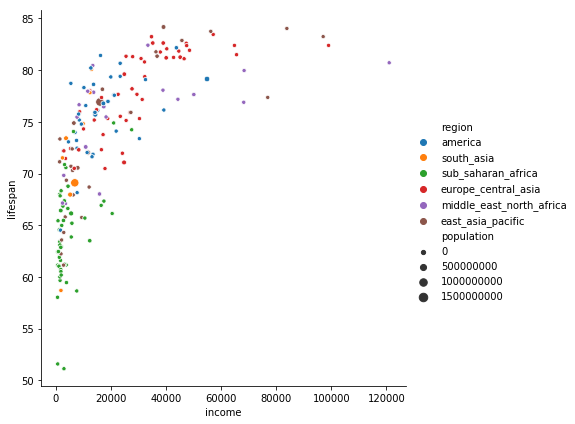

In [54]:
sns.relplot(x='income', y='lifespan',hue='region', size='population', data=now, height=6);

In [55]:
now[now['income'] > 80000]

,index,year,income,lifespan,population,country,region
22910,22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


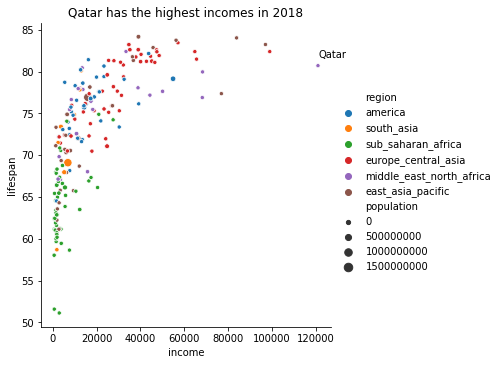

In [59]:
qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

plt.text(x=qatar_income+100, y=qatar_lifespan+1, s='Qatar')

plt.title('Qatar has the highest incomes in 2018');

In [0]:
years = [1818,1918,2018]

centuries = df[df.year.isin(years)]

In [81]:
centuries.sample(5)

,index,year,income,lifespan,population,country,region
24609,24609,1918,1669,19.97,939985,"Macedonia, FYR",europe_central_asia
18111,18111,1818,929,43.48,62125,Iceland,europe_central_asia
11528,11528,2018,1252,64.56,5187948,Eritrea,sub_saharan_africa
15902,15902,2018,7739,68.15,782225,Guyana,america
16897,16897,1918,3263,30.09,7903494,Hungary,europe_central_asia


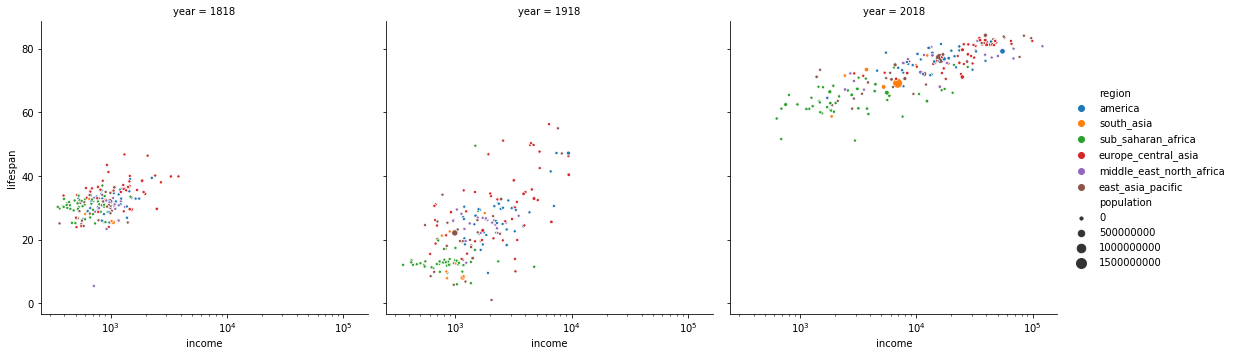

In [82]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',col='year',sizes = (10,100), data=centuries)

plt.xscale('log')

In [83]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [66]:
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

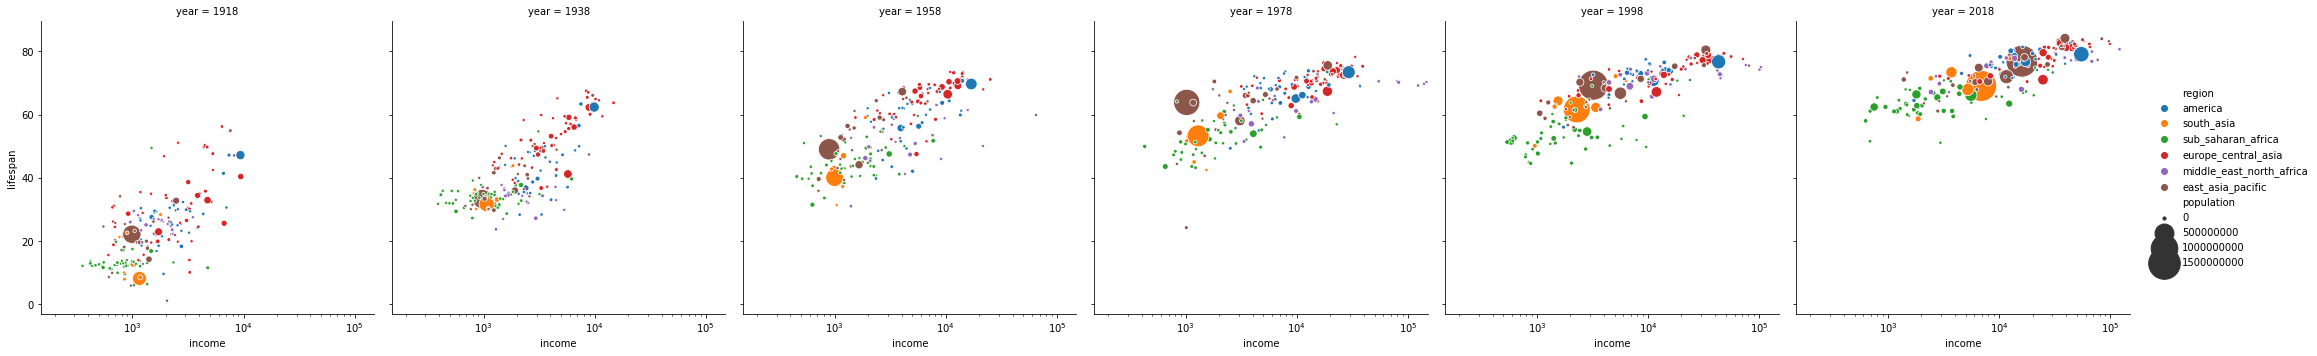

In [78]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

subset = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year',sizes = (10,1000), data=subset)

plt.xscale('log')
plt.xlim((150, 150000));

In [0]:
qatar = df[df.country=='Qatar']
qatar
USA = df[df.country=='United States']
Brazil = df[df.country=='Brazil']
SKorea = df[df.country=='South Korea']

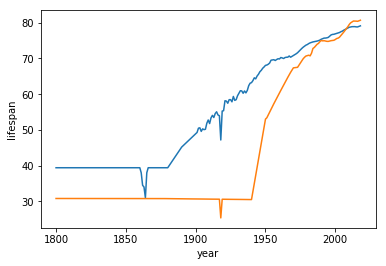

In [115]:
sns.lineplot(x='year', y='lifespan', data = USA);
sns.lineplot(x='year', y='lifespan', data = qatar);



No handles with labels found to put in legend.


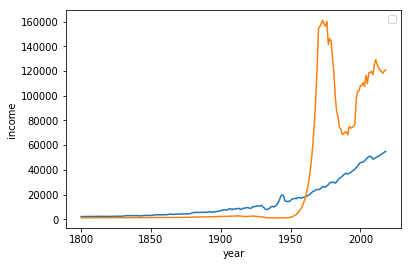

In [124]:
ax=sns.lineplot(x='year', y='income', data = USA);
ax2 = sns.lineplot(x='year', y='income', data = qatar);
ax.legend();


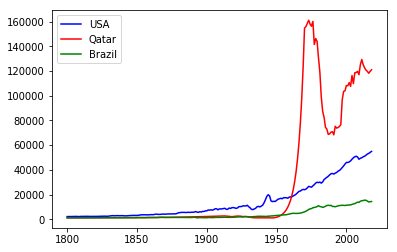

In [137]:
f, ax = plt.subplots(1, 1)

ax.plot(USA.year, USA.income, color="blue", label="USA", linestyle="-")
ax.plot(qatar.year, qatar.income, color="red", label="Qatar", linestyle="-")
ax.plot(Brazil.year, Brazil.income, color="green", label="Brazil", linestyle="-")
ax.legend();


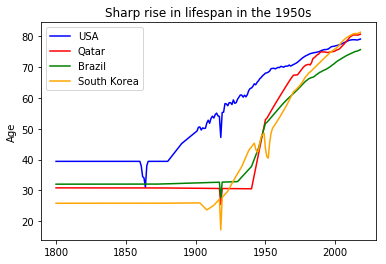

In [144]:
f, ax = plt.subplots(1, 1)

ax.plot(USA.year, USA.lifespan, color="blue", label="USA", linestyle="-")
ax.plot(qatar.year, qatar.lifespan, color="red", label="Qatar", linestyle="-")
ax.plot(Brazil.year, Brazil.lifespan, color="green", label="Brazil", linestyle="-")
ax.plot(SKorea.year, SKorea.lifespan, color="orange", label="South Korea", linestyle="-")
ax.set(title='Sharp rise in lifespan in the 1950s', ylabel='Age')
ax.legend();